# Assignment 5 - Graphical Degrading and Object Detection

## Steps for Part 1 - Graphical Degrading
1. Download zip code from assignment repository
1. Download the yolov3.weights from the readme in the github repository (This file is too big for github versioning)
1. Edit/Create an git "exclude" file in the main portfolio directory ".git/info".  Add "yolov3.weights" on a line by itself.  This avoids a git push failure due to the size of the file.
1. Unzip into your local portfolio directory for Assignment5
1. Fill in the missing code in this notebook  (You will need the working code examples to do the next step)
1. Create a python class that allows the following
   - Reads in the image
   - Create a loop that alters individual changes of the items below to determine names of identified objects and their confidence (down to when the object detetion is lost).  Remember to reset the image through each pass as they are not iterative.
     - size
     - rotation
     - noise (of your choice)
   - Graph the results
   
## Steps for Part 2 - Object Detection
1.  Generate a web interface python script that ingests a POST command of a picture Use [postman](https://www.postman.com/) to generate the post with picture of your choice.
1.  Returns the items detected and the assocated confidence
1.  Add to your python class above to offer this capability
1.  Test web interface locally
1.  Create a Dockerfile and build the image
1.  Test the Dockerfile locally
1.  Push notebook, python script, readme, etc to your github portfolio (since you are in the right location locally you just need to do a push at the main directory of the portfolio (after git add * and git commit -m " comment)
1.  Push locally built and test docker image to your docker hub portfolio.  Manually add to docker readme.
1.  Submit the two links (github Assignment5 directory and docker hub) via text submission to Canvas.

## Initial Start
* Load Libraries (Need to install wandb and cv2 - see below)
* plot_cv_image( img ) allows output of image within a notebook

In [1]:
import cv2 as cv
# !pip install opencv-python-headless
import numpy as np
import matplotlib.pyplot as plt 
# !pip install wandb
from wandb import Classes


def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')  
    # Must save prior to show - for show clears the image!
    plt.savefig("DetectionOutput.jpg")
    plt.show()

## Load Yolo Model

In [2]:
# load yolo
net = cv.dnn.readNet("yolov3.weights",  #note weights to too big for github must save within readme
                     "yolov3.cfg")

## Identify the number of layers in the model and their names

In [3]:
ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

## Read in and print out the categories for Yolo

In [4]:
classes = []
with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

## Read in an image and output its dimensions

In [5]:
img = cv.imread("pictures/bermuda.jpg")
print("Original Shape: ", img.shape)

Original Shape:  (2229, 3344, 3)


## Resize the image and output its dimensions

In [6]:
#Resize based to maximum 416px for either width or height. The other side will be resized proportionally, to avoid distorion
image_height = img.shape[0]
image_width = img.shape[1]

if image_width >= image_height:
    new_width = 416
    new_height = int(image_height * (new_width / image_width))
else:
    new_height = 416
    new_width = int(image_width * (new_height / image_height))

img = cv.resize(img, (new_width, new_height))

height, width, channel = img.shape
print("Resized Shape: ", img.shape)

Resized Shape:  (277, 416, 3)


## Rotate the image using cv

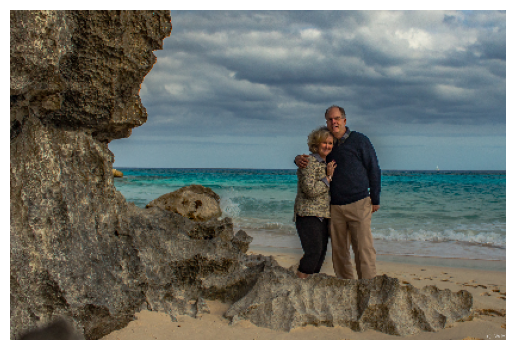

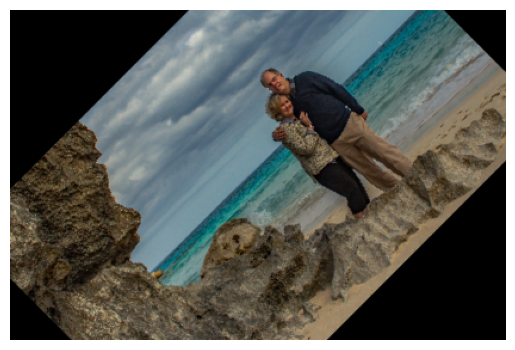

In [7]:
# Rotate
angle = 45

#Find image center, to set as axis of rotation
#Using the resized image as example
center = (new_width/2, new_height/2)
#Configure rotation matrix
M = cv.getRotationMatrix2D(center, angle, 1.0)
#Do the rotation on axis
rotated_image = cv.warpAffine(img, M, (new_width, new_height))

plot_cv_img(img)
plot_cv_img(rotated_image)

#Using cv.rotate()
#rotated_image = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)

## Rotate the image using scipy (might have to install if necessary)

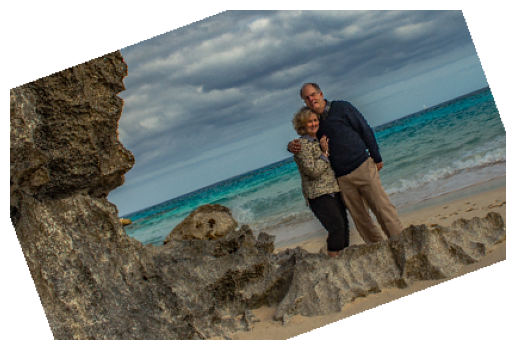

In [8]:
# Rotate
from scipy import ndimage

angle_scipy = 20 

# Rotate the image using scipy.ndimage.rotate
rotated_img_scipy = ndimage.rotate(img, angle_scipy, reshape=False, mode='constant', cval=255)

plot_cv_img(rotated_img_scipy)

## Add Salt and Pepper Noise

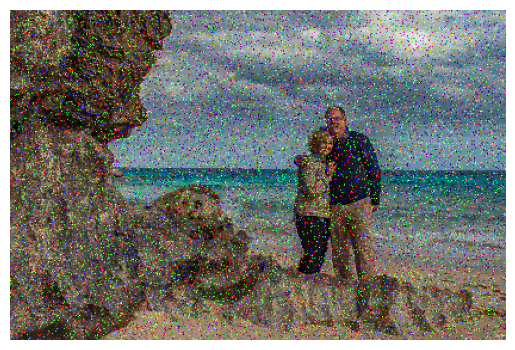

In [9]:
#add salt and pepper noise
from skimage.util import random_noise
# Add salt-and-pepper noise to the image.

# Adjust the amount as needed. Higher amount >> higher noise levels
noise_img = random_noise(img, mode='s&p', amount=0.1)  

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]

noise_img = np.array(255*noise_img, dtype = 'uint8')

plot_cv_img(noise_img )

# Add Gaussian noise

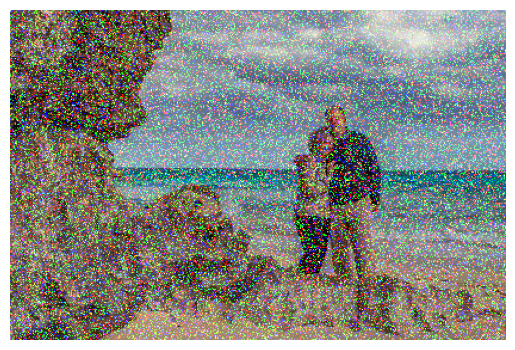

In [10]:
#Configure gaussian noise
mean = 0
std_dev = 1
gauss = np.random.normal(mean, std_dev, img.shape).astype('uint8')
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = cv.add(img, gauss)  

# Display the image
plot_cv_img(img_gauss)

## Add Speckle Noise with color

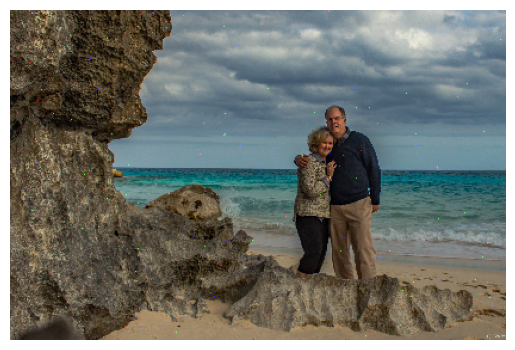

In [11]:
#img = cv.imread('pictures/bermuda.jpg')

# Configure the speckle noise

intensity = 0.3
speckle_noise = np.random.normal(0, intensity, img.shape).astype('uint8')

# Add speckle noise to the image
speckle_img = cv.add(img, speckle_noise)

plot_cv_img(speckle_img )

## Set up layers and colors

In [12]:
layer_name = net.getLayerNames()
output_layer = [layer_name[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Fire up Model

In [13]:
# Define the input dimensions expected by the YOLO model
input_width = 416
input_height = 416

# Change the processed image, for testing
img = speckle_img

# Create a blob from the image
blob = cv.dnn.blobFromImage(img, 1.0/255.0, (input_width, input_height), [0, 0, 0], True, crop=False)

#detect objects
net.setInput(blob)
outs = net.forward(output_layer)


## Set up image on screen  (all done for you)
* Note how to extract the identified objects and their assocated confidence.  You need that for part 2 of this assignment

Type:  <class 'list'>
[4 6]
Object: person with confidence of 1.00
Object: person with confidence of 1.00


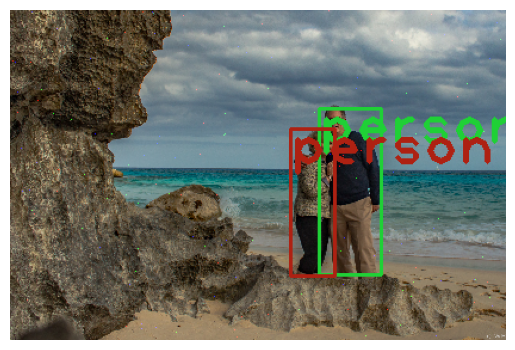

In [14]:
# Showing Information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detection
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
            # Reactangle Cordinate
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
           
print("Type: ", type(class_ids))

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(f'Object: {label} with confidence of {confidences[i]:.2f}')
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y + 30), font, 3, color, 3)

plot_cv_img(img)

# Summary
* Assignment and Model Results
* Techniques to improve the results

PUT YOUR ANSWERS HERE which could include additional cells with working code examples

After testing with multiple picture resolution (size) values, I decided to keep a 416x416 resolution. This was also based on some research, where it appears to be a common practice. This resolution provides a good compromise between image quality and processing requirements.
The code then changes the angle and introduces speckle noise incrementally, giving an output of 10 images with the incremental changes. Each image includes the identified object, if any, together with the confidence rate.
During my testing, I observed the model identified an "umbrella" on several ocassions. The umbrella was always the contour of the background ocean and sky. My first action was to increase the minimum degree of confidence to 0.8. The "umbrella" detection still occurred on two more occassions with confidence > 0.8. It'd be worth to review the weights and configuration to fine-tune the interpretation of this object.

